In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
range_res = 0.044
end_range = 255
ranges = np.arange(0, end_range+1).reshape(-1, 1) * range_res
azimuths = np.arange(181).reshape(1, -1) * np.pi / 180
xs_idx = ranges * np.cos(azimuths) // range_res
ys_idx = ranges * np.sin(azimuths) // range_res
df = pd.DataFrame({
    'x_idx': xs_idx.flatten().astype(np.int),
    'y_idx': ys_idx.flatten().astype(np.int),
    'rcs': np.random.randn(np.product(xs_idx.shape))
})
df_group = df.groupby(['x_idx', 'y_idx'], as_index=False).mean()
xs_idx2 = (df_group.x_idx + 255).to_list()
ys_idx2 = df_group.y_idx.to_list()
rcs = df_group.rcs.to_list()
bbox = np.zeros((256*2, 256))
bbox[xs_idx2, ys_idx2] = rcs

In [62]:
df_group.describe()

,x_idx,y_idx,rcs
count,38893.000000,38893.000000,38893.000000
mean,-0.496542,88.817448,0.001865
std,110.645427,64.564235,0.970833
min,-255.000000,0.000000,-4.850919
25%,-77.000000,34.000000,-0.643944
50%,0.000000,76.000000,0.004497
75%,76.000000,135.000000,0.649232
max,254.000000,254.000000,3.738172


In [61]:
max(ys_idx2), min(ys_idx2)

(254, 0)

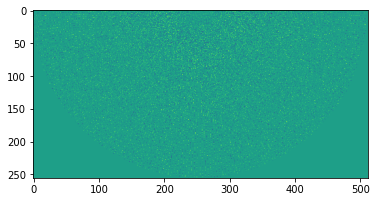

In [57]:
plt.imshow(bbox.T)

In [58]:
bbox.shape

(512, 256)